In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm

# Model definitions

In [118]:
def model_0(x, w, b, lapse):
    """
    Null model: fixed slope and bias across all trials.
    """
    p = norm.cdf(w * x + b)
    return p * (1 - lapse) + 0.5 * lapse


In [119]:
def model_1(x, w, b_dict, condition, lapse):
    """
    Bias model: same slope w, different bias b by condition.
    b_dict: dictionary with condition keys (e.g., 'threat+', 'threat-') and corresponding bias values.
    """
    b = b_dict[condition]
    p = norm.cdf(w * x + b)
    return p * (1 - lapse) + 0.5 * lapse


In [120]:
def model_2(x, w_dict, b, condition, lapse):
    """
    Sensitivity model: same bias b, different slope w by condition.
    w_dict: dictionary with condition keys and corresponding slope values.
    """
    w = w_dict[condition]
    p = norm.cdf(w * x + b)
    return p * (1 - lapse) + 0.5 * lapse


In [121]:
def loss(model_choices, real_choices):
    """
    Loss function: sum of squared differences between model choices and real choices.
    """
    return np.sum((np.array(model_choices) - np.array(real_choices)) ** 2)

In [243]:
def log_likelihood(model_probs, real_choices):
    """
    Log-likelihood function: sum of log probabilities of the model choices.
    """
    return np.sum(np.log(model_probs) * np.array(real_choices) + np.log(1 - model_probs) * (1 - np.array(real_choices)))

# Sim

In [194]:
# Parameters

n_trials = 100
x = np.random.randint(-7, 8, size=n_trials)
z = np.random.choice(['threat+', 'threat-'], size=n_trials)
correct_responses = [(lambda x: 1 if x > 0 else 0)(x) for x in x]

In [227]:
w0 = 0.6
b0 = 0.99

b_dict = {'threat+': 0.5, 'threat-': -0.5}

w_dict = {'threat+': 1.5, 'threat-': 0.8}

lapse = 0.05

In [228]:
x

array([-7,  4, -2, -1, -4, -4, -4,  3, -5, -3, -6, -2, -3,  1,  1,  5, -1,
        6, -3, -4,  6,  6,  2,  5,  2, -2, -4, -3,  6,  7, -5, -3, -1, -5,
        4,  2,  2,  2,  4,  0, -3, -3,  7, -4,  6, -5, -4,  6,  2, -7,  6,
       -1, -1, -6, -3,  4, -6, -3,  6,  1, -4,  7, -3, -7,  0, -7,  4,  1,
        4, -7,  2,  6, -1, -4,  6,  1, -7,  0,  0, -7, -3,  3, -5, -5, -5,
        2,  0, -6, -5, -2,  4, -7, -5, -7, -7,  5, -1,  0,  4,  4])

In [229]:
probs = []
for y in range(n_trials):
    condition = z[y]

    # Model 0: fixed parameters
    p_zero = model_0(x[y], w0, b0, lapse)

    # Model 1: bias depends on condition
    p_one = model_1(x[y], w0, b_dict, condition, lapse)

    # Model 2: slope depends on condition
    p_two = model_2(x[y], w_dict, b0, condition, lapse)

    probs.append((p_zero, p_one, p_two))

In [233]:
model_zero_probs = np.array(probs)[:, 0]
model_zero_choice = [(lambda x: 1 if x > 0.5 else 0)(x) for x in model_zero_probs]


In [235]:
model_one_probs = np.array(probs)[:, 1]
model_one_choice = [(lambda x: 1 if x > 0.5 else 0)(x) for x in model_one_probs]

In [236]:
model_two_probs = np.array(probs)[:, 2]
model_two_choice = [(lambda x: 1 if x > 0.5 else 0)(x) for x in model_two_probs]

In [237]:
model_one_choice == model_two_choice

False

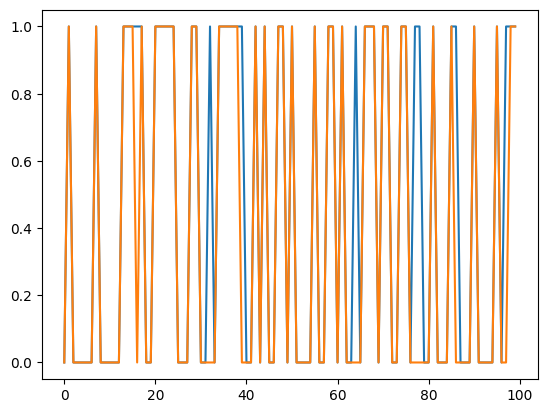

In [241]:
plt.plot(model_two_choice)
plt.plot(correct_responses)

In [242]:
print(loss(model_zero_choice, correct_responses))
print(loss(model_one_choice, correct_responses))
print(loss(model_two_choice, correct_responses))

13
2
8


In [246]:
log_likelihood_zero = log_likelihood(model_zero_probs, correct_responses)
log_likelihood_one = log_likelihood(model_one_probs, correct_responses)
log_likelihood_two = log_likelihood(model_two_probs, correct_responses)

In [247]:
print("Log-likelihood for model 0:", log_likelihood_zero)
print("Log-likelihood for model 1:", log_likelihood_one)
print("Log-likelihood for model 2:", log_likelihood_two)

Log-likelihood for model 0: -25.72379463658108
Log-likelihood for model 1: -15.22660700112284
Log-likelihood for model 2: -16.727075873973973
